# Model Training for ZoneAirflow  
This is the model training for classifying labels for the zone airflow. The model deployed will be used for the ZoneAirflow ML model within the ML Pipeline.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import dump
from methods import MLTraining as mlt

### Read Data

In [5]:
data_pathway = "data/seb/ZoneAirflow_60_Labeled.csv"
df = pd.read_csv(data_pathway, header = 0, index_col = False)

# display (rows, columns)
df.shape

(8050, 27)

### Map Labels
We need to transform all labels from the String type and map them into numbers before using them for training the model. 

In [6]:
label_list = df.label.unique().tolist()
label_list

['Normal Operation', 'Hunting', 'Constant', 'Override']

In [7]:
label_dict = mlt.label_list_to_dict(label_list)

df['Label_Numbered'] = [label_dict[x] for x in df['label']]

In [8]:
df['Label_Numbered']

0       0
1       0
2       0
3       0
4       0
       ..
8045    1
8046    0
8047    1
8048    1
8049    0
Name: Label_Numbered, Length: 8050, dtype: int64

In [9]:
y = df["Label_Numbered"]
X = df.drop(columns=["Date","Attr", "label", "Label_Numbered"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Columns for Training Dataset
These are the columns that will be used to train the model (notice they are the 

In [10]:
X.columns

Index(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
      dtype='object')

### DecisionTreeClassifier

0.9428571428571428
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1246
           1       0.80      0.86      0.83       138
           2       0.95      0.97      0.96       170
           3       0.63      0.79      0.70        56

    accuracy                           0.94      1610
   macro avg       0.84      0.89      0.86      1610
weighted avg       0.95      0.94      0.94      1610



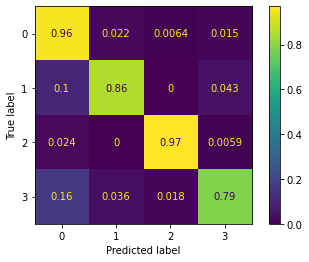

In [11]:
decision_tree, decision_plot = mlt.train_decision_tree(X_train, X_test, y_train, y_test)
decision_plot

## Random Forest

0.9695652173913043
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1246
           1       0.89      0.91      0.90       138
           2       0.98      0.98      0.98       170
           3       0.90      0.77      0.83        56

    accuracy                           0.97      1610
   macro avg       0.94      0.91      0.92      1610
weighted avg       0.97      0.97      0.97      1610



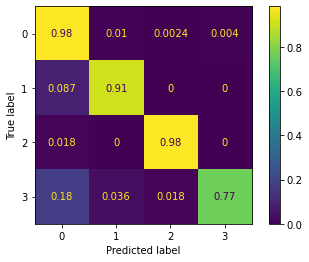

In [12]:
rand_tree, rand_tree_plot = mlt.train_random_forest(X_train, X_test, y_train, y_test)
rand_tree_plot

### K Nearest Neighbor

0.9745341614906833
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1246
           1       0.92      0.89      0.91       138
           2       0.98      0.99      0.99       170
           3       0.98      0.75      0.85        56

    accuracy                           0.97      1610
   macro avg       0.97      0.91      0.93      1610
weighted avg       0.97      0.97      0.97      1610



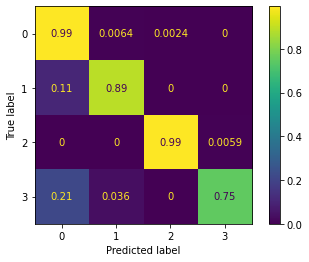

In [13]:
knn_tree, knn_plot = mlt.train_knn(X_train, X_test, y_train, y_test)

### Export Model

In [14]:
dump(decision_tree, 'models/zone_airflow_model.joblib')

['models/zone_airflow_model.joblib']

### Labels used (Order must match when used for ML Pipeline)

In [15]:
label_list

['Normal Operation', 'Hunting', 'Constant', 'Override']